# Qiskit outputs example

This example demonstrates three different ways to output results from a Qiskit program:

- Getting the `Statevector` at different points of the computation.
- Using the `Sampler` feature to get frequency counts for measured qubits.
- Using the `Estimator` feature for a more concise and powerful way to compute estimated values for observables such as $\langle X\rangle, \langle Z\rangle$.


## Imports and initilization

In [46]:
from IPython.display import display, Markdown
from ipywidgets import FloatSlider
from math import cos, sin, pi as π
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Estimator, Sampler
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.quantum_info import SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram

def create_state(θ, φ):
    α = cos(θ/2)
    β = sin(θ/2) * (cos(φ) + 1j * sin(φ)) # exp(iφ) sin(θ/2)
    return Statevector([α, β])


def create_circuit(θ, φ, θX, θY, θZ, classical = False):
    q = [q0] = QuantumRegister(1, 'q')
    if classical:
        c = [c0] = ClassicalRegister(1, 'c')
        circuit = QuantumCircuit(q, c)
    else:
        circuit = QuantumCircuit(q)
    initial_state = create_state(θ, φ)
    circuit.initialize(initial_state, q0)
    circuit.save_statevector(label = "Ψ₀")
    if θX != 0:
        circuit.rx(θX, q0)
    if θY != 0:
        circuit.ry(θY, q0)
    if θZ != 0:
        circuit.rz(θZ, q0)
    circuit.save_statevector(label = "Ψ₁")
    if classical:
        circuit.measure(q0, c0)
    return circuit

## Input

The inputs are:

* $\theta$ and $\phi$ specify the initilization state via $|\psi\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle$.
* $\theta_X$ specifies an $R_X(\theta_X)$ gate applied to the qubit.
* $\theta_Y$ specifies an $R_Y(\theta_Y)$ gate applied to the qubit.
* $\theta_Z$ specifies an $R_Z(\theta_Z)$ gate applied to the qubit.

In [2]:
θ = FloatSlider(value = 0, min = 0, max = π, step = π/24, description = "θ:")
φ = FloatSlider(value = 0, min = 0, max = 2*π, step = π/24, description = "φ:")

θX = FloatSlider(value = 0, min = 0, max = 2*π, step = π/24, description = "θX:")
θY = FloatSlider(value = 0, min = 0, max = 2*π, step = π/24, description = "θY:")
θZ = FloatSlider(value = 0, min = 0, max = 2*π, step = π/24, description = "θZ:")

display(θ)
display(φ)

display(θX)
display(θY)
display(θZ)

FloatSlider(value=0.0, description='θ:', max=3.141592653589793, step=0.1308996938995747)

FloatSlider(value=0.0, description='φ:', max=6.283185307179586, step=0.1308996938995747)

FloatSlider(value=0.0, description='θX:', max=6.283185307179586, step=0.1308996938995747)

FloatSlider(value=0.0, description='θY:', max=6.283185307179586, step=0.1308996938995747)

FloatSlider(value=0.0, description='θZ:', max=6.283185307179586, step=0.1308996938995747)

## Statevector output

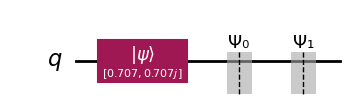

Ψ₀ = $\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2} i}{2} |1\rangle$

Ψ₁ = $\frac{\sqrt{2}}{2} |0\rangle+\frac{\sqrt{2} i}{2} |1\rangle$

In [47]:
circuit = create_circuit(θ.value, φ.value, θX.value, θY.value, θZ.value)
simulator = AerSimulator()
result = simulator.run(circuit).result()
data = result.data(0)
Ψ0 = data["Ψ₀"].draw("latex_source")
Ψ1 = data["Ψ₁"].draw("latex_source")

display(circuit.draw("mpl"))
display(Markdown(f"Ψ₀ = ${Ψ0}$"))
display(Markdown(f"Ψ₁ = ${Ψ1}$"))


## Sampler output

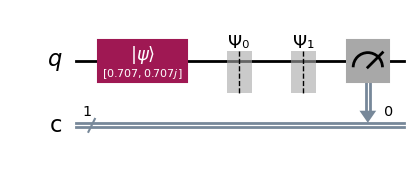

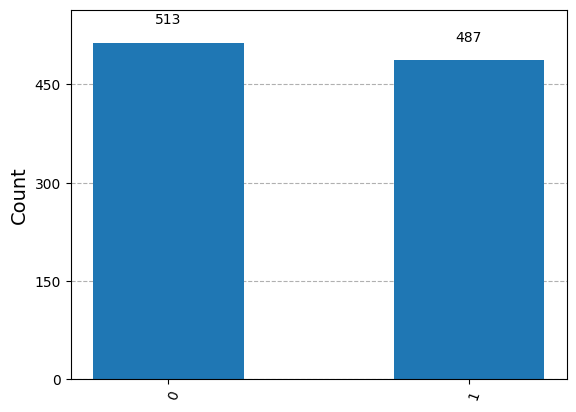

In [48]:
circuit = create_circuit(θ.value, φ.value, θX.value, θY.value, θZ.value, classical = True)
display(circuit.draw("mpl"))

simulator = AerSimulator()
sampler = Sampler(simulator)
job = sampler.run([circuit], shots = 1000)
result = job.result()
counts = result[0].data.c.get_counts()
plot_histogram(counts)


## Estimator output

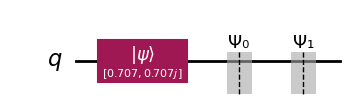

array([1.])

In [50]:
circuit = create_circuit(θ.value, φ.value, θX.value, θY.value, θZ.value)
display(circuit.draw("mpl"))

simulator = AerSimulator()
estimator = Estimator(simulator)
observable = SparsePauliOp.from_list([("Y", 1)])
pub = (circuit, [[observable]])
job = estimator.run(pubs=[pub])
result = job.result()
expectation = result[0].data.evs[0]
display(expectation)